#### Overview:

#### Insurance claim occurs when the policy holder(customer i.e,vehicle owner) files a request to the insurer seeking for coverage/compensation for the accident.
#### Automotive insurance quotes are determined by severals factors and these factors determines how much a driver will have to pay for their insurance contract.Some examples of these factors are credit history,previous history of insurance claim, the age of the vehicle,type of the vehicle,use of the vehicle(private or commerical).
#### The overall aim of the project is to generate an predictive model for the company to improve their business by understanding the customer informations in a better way.From the result of the model the company will be able to make insurance coverage more accessible to drivers.This could be achieved by using predictions to accomodate more reasonably priced policies according to the driver's risk assessment and the cost of the vehicle on road.
##### If a driver has clean driving history, it would be unfair for them to have to pay similar insurance fee as that of a driver with bad driving history.The model should therefore be able to make it clear which driver is unlikely to make a claim and unadjust his/her quote lower and increase the insurance fee for those who are more likely to make a claim

#####  This algorithm is modelled on data which represents that a customer has made a claim (1) or not made a claim(0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('train.csv')
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [ ]:
df.duplicated().sum()

0

#### There are no duplicates

In [ ]:
df.shape

(595212, 59)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


##### There are no null values in the features

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


##### There are no null or nan values in the dataset. However, there are many fields with value as  -1 
##### Dataset has around 595212 records with 59 features

In [ ]:
feature=[]
count=[]
for column in df.columns:
    negative = df[df[column] == -1][column].count()

    if negative > 0:
        print(column, 'has', negative, 'records with negative values')
        feature.append(column)
        df_feature=pd.DataFrame(feature,columns=['Feature'])
        count.append(negative)
        df_count=pd.DataFrame(count,columns=['Count'])
        df_negative=pd.concat([df_feature,df_count],axis=1)



ps_ind_02_cat has 216 records with negative values
ps_ind_04_cat has 83 records with negative values
ps_ind_05_cat has 5809 records with negative values
ps_reg_03 has 107772 records with negative values
ps_car_01_cat has 107 records with negative values
ps_car_02_cat has 5 records with negative values
ps_car_03_cat has 411231 records with negative values
ps_car_05_cat has 266551 records with negative values
ps_car_07_cat has 11489 records with negative values
ps_car_09_cat has 569 records with negative values
ps_car_11 has 5 records with negative values
ps_car_12 has 1 records with negative values
ps_car_14 has 42620 records with negative values


<Axes: xlabel='Feature'>

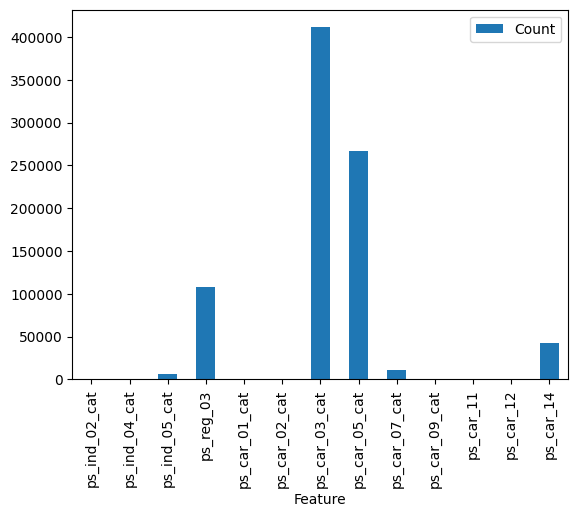

In [ ]:
df_negative.plot(x='Feature', y='Count', kind='bar' )

##### ps_car_03_cat, ps_car_05_cat has many missing values.ps_car_03_cat has roughly around 70% of data that is missing and hence is not reliable. Assigning mean or median to the missing values of this feature maynot be a correct approach as there are very less values that truely represents this feature and hence this feature is dropped from the dataframe.

In [ ]:
for col in df.columns:
    print('column is',col, df[col].unique())

column is id [      7       9      13 ... 1488017 1488021 1488027]
column is target [0 1]
column is ps_ind_01 [2 1 5 0 4 3 6 7]
column is ps_ind_02_cat [ 2  1  4  3 -1]
column is ps_ind_03 [ 5  7  9  2  0  4  3  1 11  6  8 10]
column is ps_ind_04_cat [ 1  0 -1]
column is ps_ind_05_cat [ 0  1  4  3  6  5 -1  2]
column is ps_ind_06_bin [0 1]
column is ps_ind_07_bin [1 0]
column is ps_ind_08_bin [0 1]
column is ps_ind_09_bin [0 1]
column is ps_ind_10_bin [0 1]
column is ps_ind_11_bin [0 1]
column is ps_ind_12_bin [0 1]
column is ps_ind_13_bin [0 1]
column is ps_ind_14 [0 1 2 3 4]
column is ps_ind_15 [11  3 12  8  9  6 13  4 10  5  7  2  0  1]
column is ps_ind_16_bin [0 1]
column is ps_ind_17_bin [1 0]
column is ps_ind_18_bin [0 1]
column is ps_reg_01 [0.7 0.8 0.  0.9 0.6 0.5 0.4 0.3 0.2 0.1]
column is ps_reg_02 [0.2 0.4 0.  0.6 1.8 0.1 0.7 1.4 0.9 0.3 0.5 0.8 1.  1.3 1.6 1.5 1.2 1.1
 1.7]
column is ps_reg_03 [ 0.71807033  0.76607767 -1.         ...  1.60078106  1.63075903
  1.74355958]
co

#####  ps_reg_03,ps_car_12 and ps_car_14 is continuous apart from them all the above mentioned fields are ordinal
##### From the primary analysis of fields, we can see that fields ending with the name 'bin' holds binary data [0,1] while fields ending with the name 'cat' holds categorical data.


#### Assumptions:
##### *Features belonging to similar groups are tagged as ind,reg,car and calc.
##### *Few features mentioned above has value -1. This could be missing values and will be imputed by mean,median or mode going forward

# Data Preprocessing
### Our target column is a binary variable. 1 if claim has occurred, 0 if no claim has occurred.

0    573518
1     21694
Name: target, dtype: int64

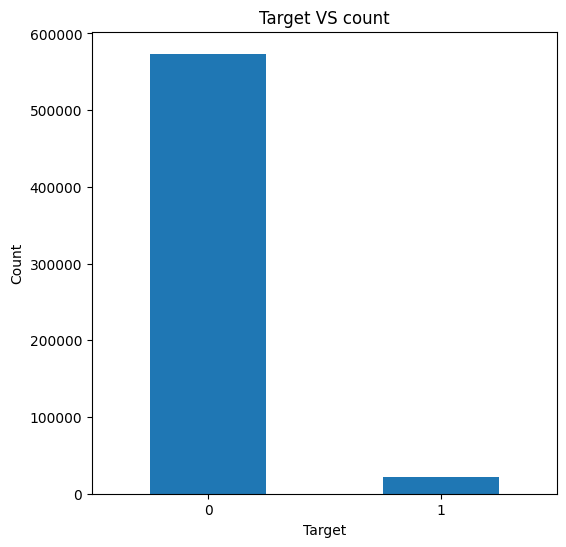

In [ ]:
fig, ax = plt.subplots()
df['target'].value_counts().plot(ax=ax, kind='bar',figsize=(6,6),title='Target VS count')
plt.xticks(rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Count')
count=df['target'].value_counts()
count

##### The target field is highly imbalanced with class 0 having 96.35% of the records and class 1 having 3.65% of the records i.e.,the dataset has details of cases were insurance claim was not made majority of the times. Hence oversampling should be done to balance the data

<Axes: >

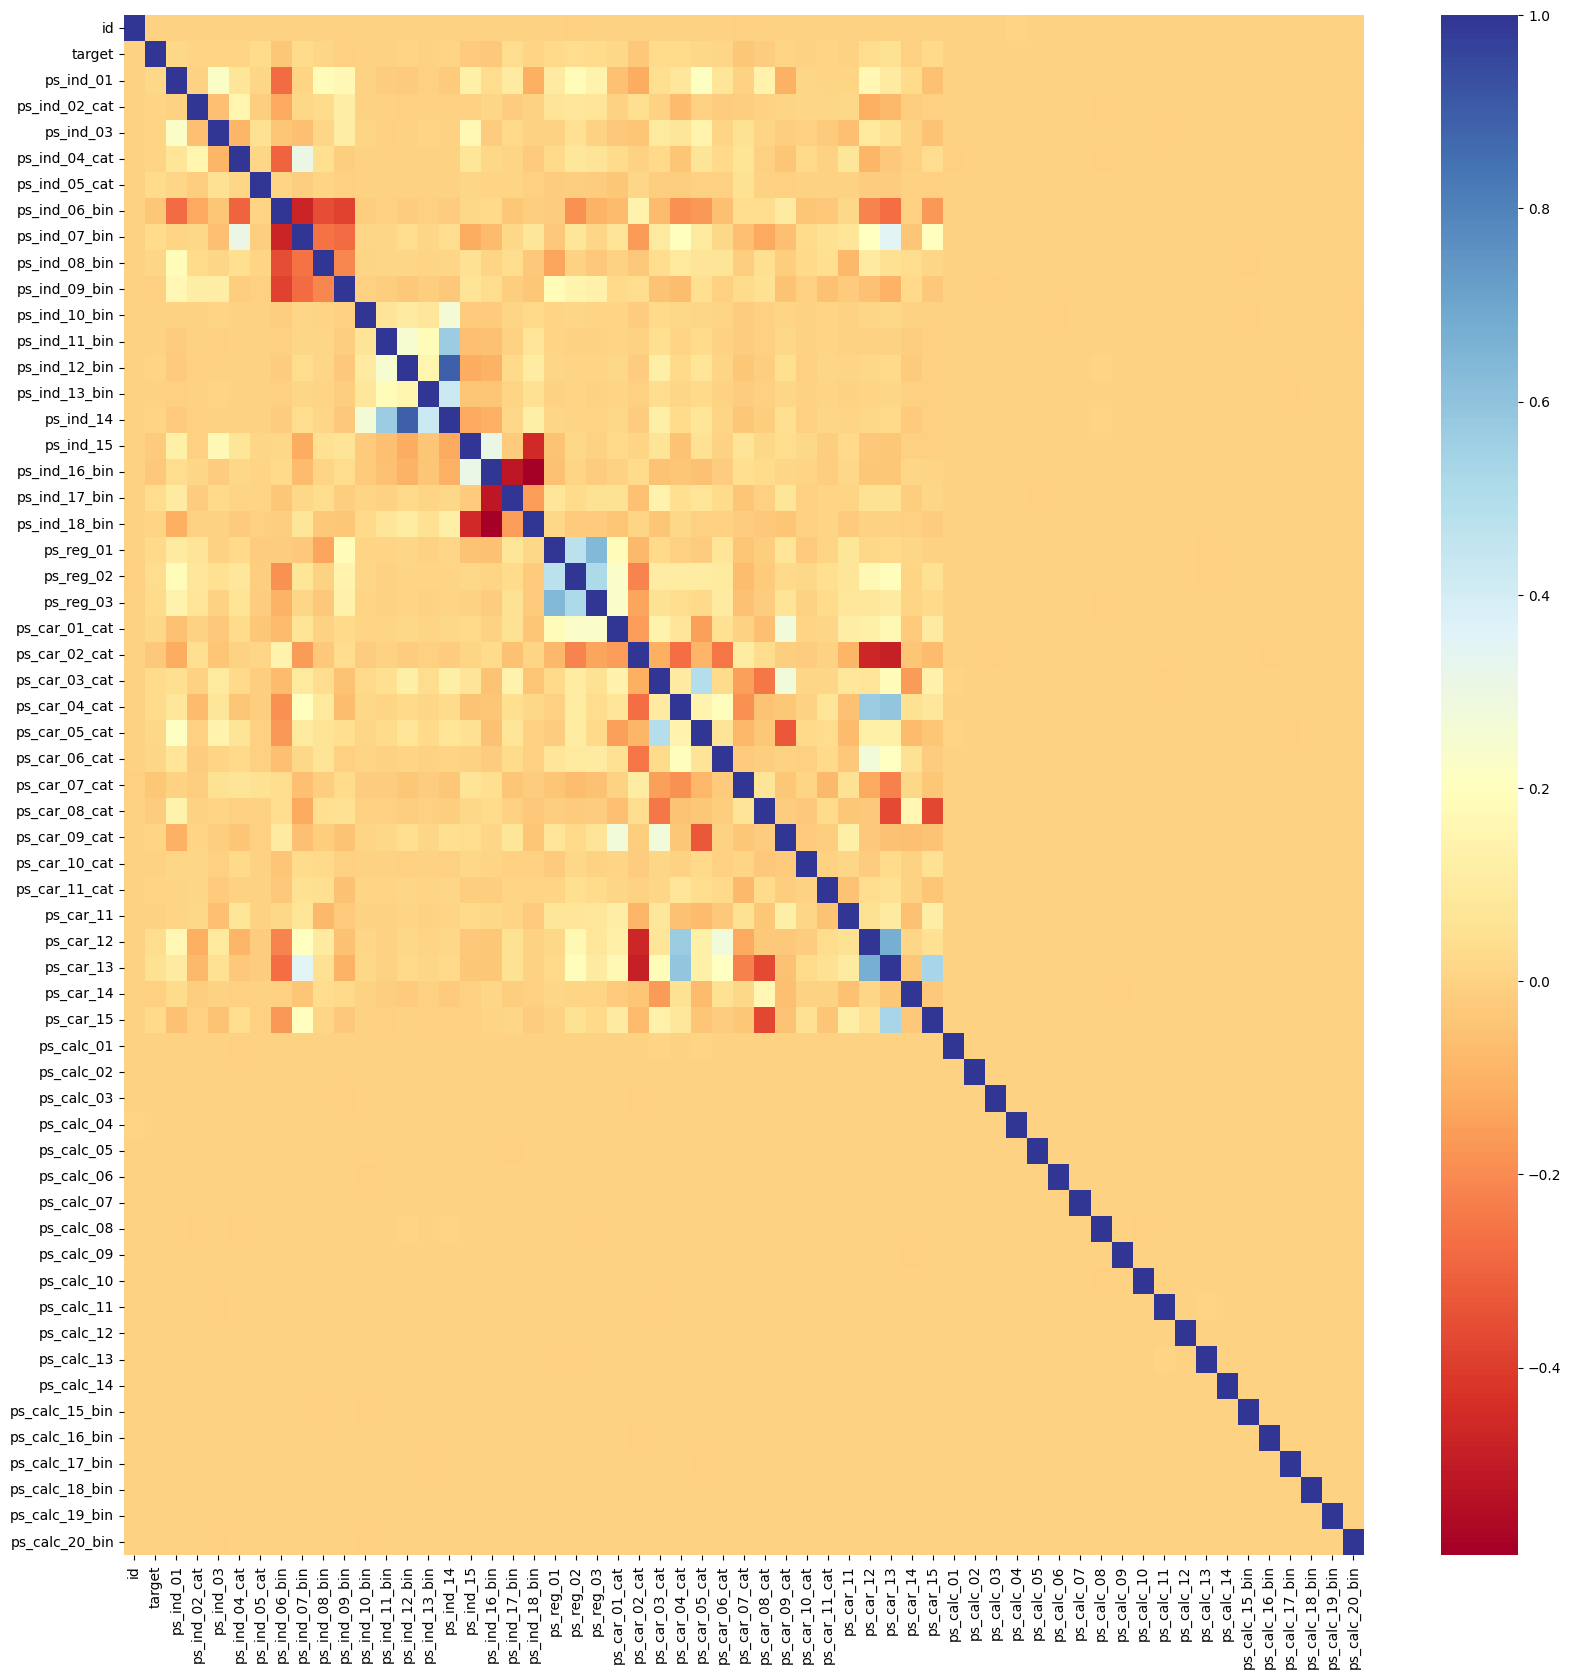

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),cmap='RdYlBu', annot_kws={'size':30}, ax=ax)

#### From the above heatmap, it is clear that all _calc_ variables do not correlate well with other variables. Though there are other features with a relatively poor relationship with the target variable, the calc variables do not have any correlation with the target variable.Hence we can remove the calc field.Thus we can clearly remove cakc features from the dataframe

In [ ]:
df_float=df.select_dtypes(include=['float64'])
df_int=df.select_dtypes(include=['int64'])
df_int.drop('target',inplace=True,axis=1)
df_int

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,5,2,3,1,0,0,0,1,0,...,4,1,4,2,0,1,1,1,0,0


## Correlation of continuous features

<Axes: >

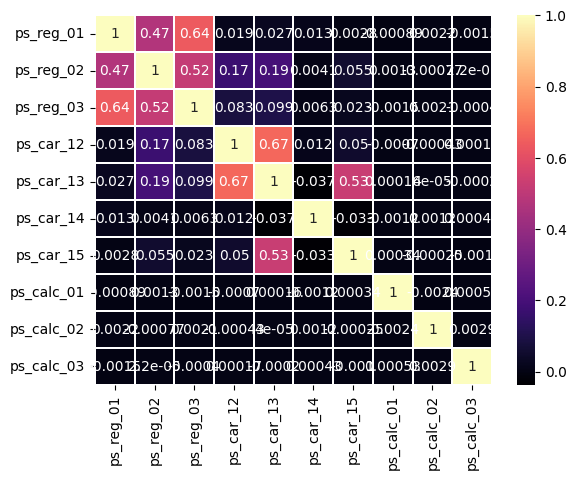

In [ ]:
colormap=plt.cm.magma
sns.heatmap(df_float.corr(),cmap=colormap,annot=True,linewidth= 0.1, vmax= 1.0,linecolor= 'white')

#### Majority of the features has very less or no correlation to one another.


## Correlation of other fields

<Axes: >

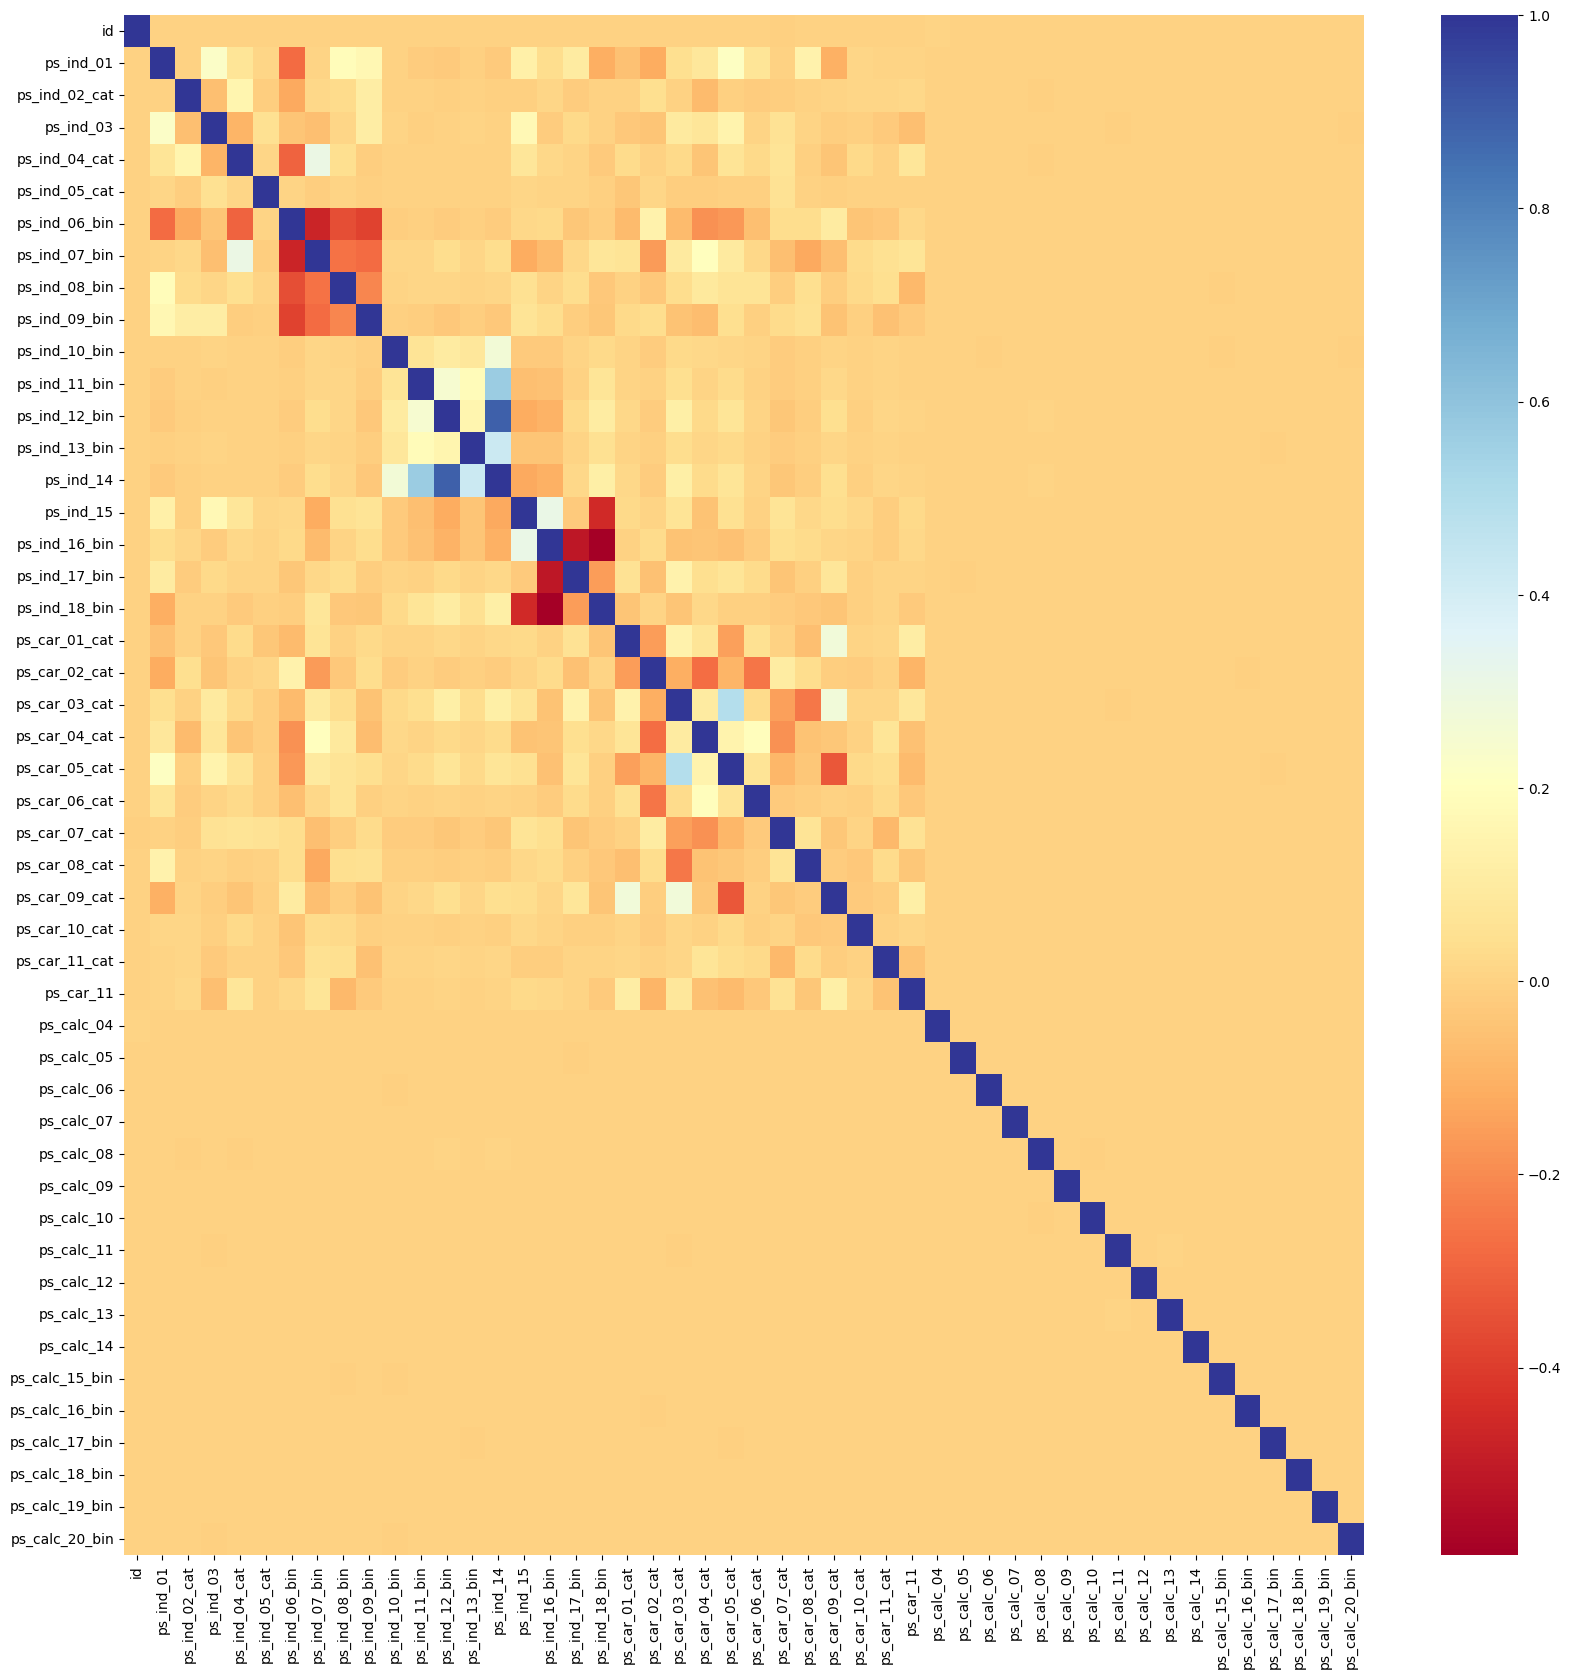

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df_int.corr(),cmap='RdYlBu', annot_kws={'size':30}, ax=ax)

In [5]:
# Drop fields with field name _calc, ps_car_03_cat(about 70% of the values are missing)
# Replace missing values in _cat and _bin with mode
# Replace missing values in all other fields with median
for cols in df.columns:
    df[cols].replace(-1,np.NaN,inplace=True)
    if '_calc' in cols or 'ps_car_03_cat' in cols:
        df.drop([cols],axis=1,inplace=True)
    elif '_cat' in cols or '_bin' in cols or 'ps_car_11' in cols:
        
        df[cols].fillna(df[cols].mode()[0],inplace=True)
    else:
        
       df[cols].fillna(df[cols].median(),inplace=True)


#### Models performed better when the missing values were replaced by median instead of mean

In [ ]:
df.shape

(595212, 38)

#### The id column is some kind of ID and has all unique value and has 0 correlation with other features as well as with the target features. Hence can be removed

#### There are few outliers in the dataset. However, since we are not able to make any meaningful conclusions from the data because of lack of information about the dataset, we are skipping the EDA and proceeding with the model creation.



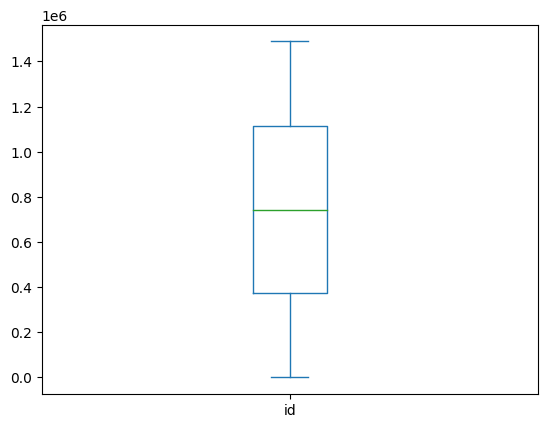

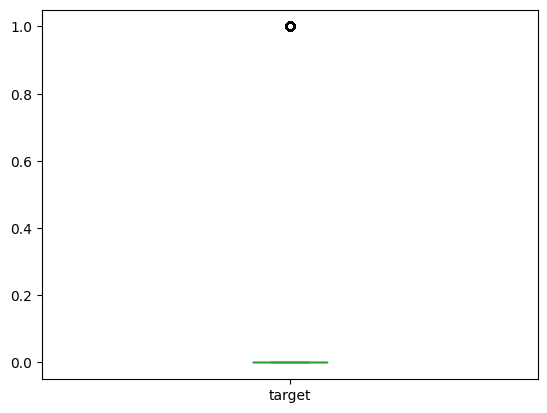

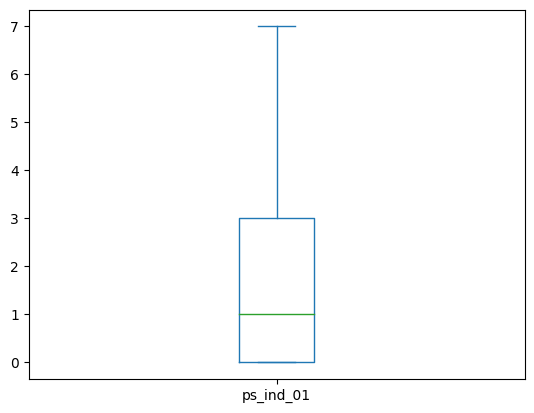

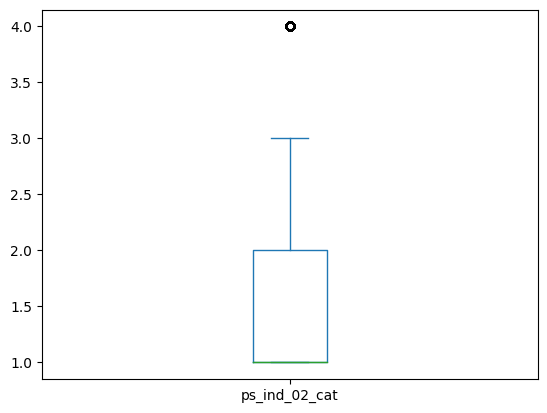

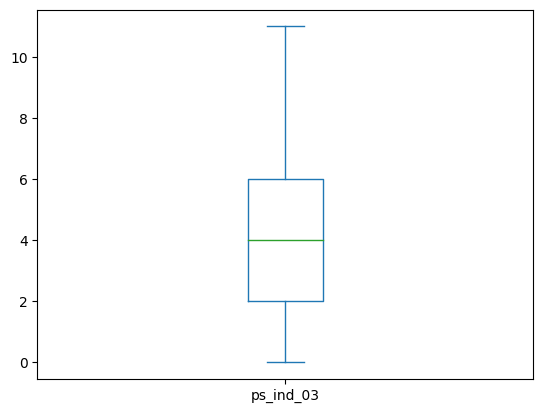

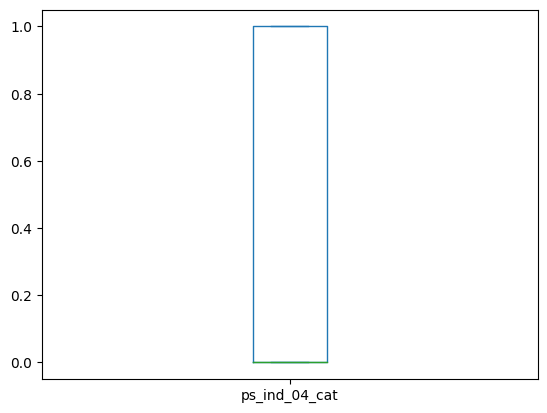

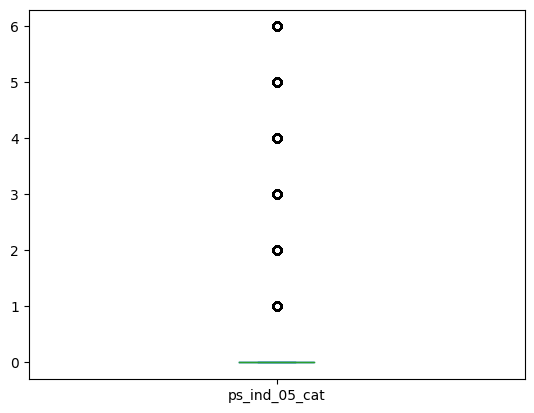

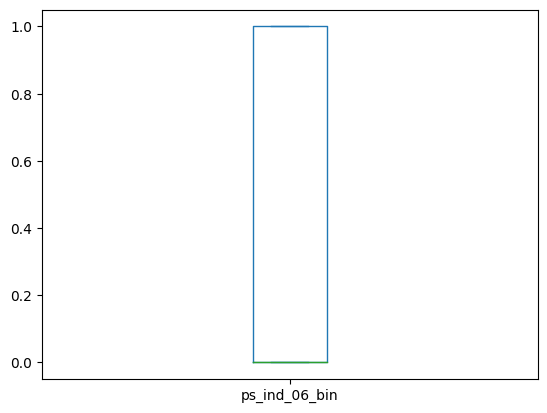

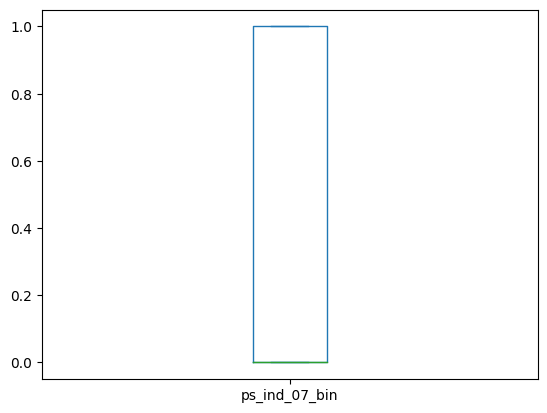

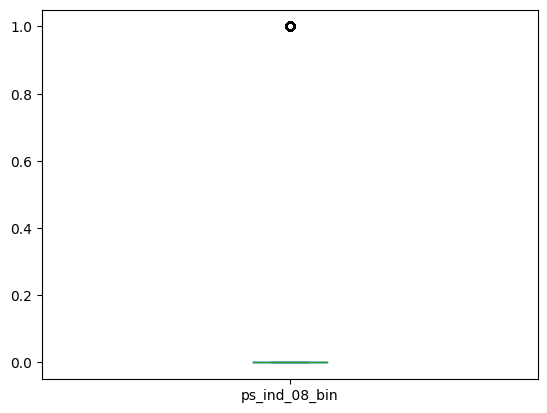

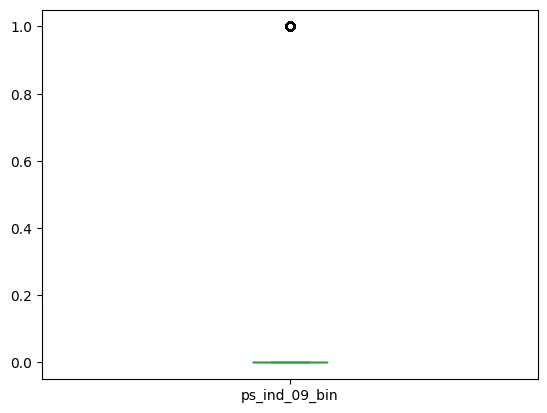

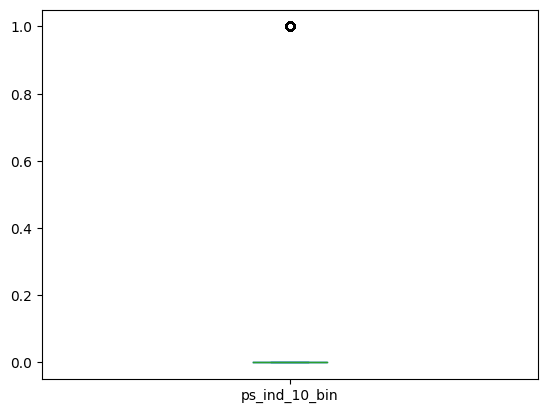

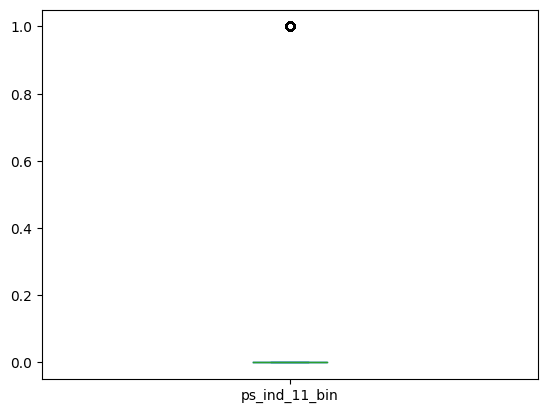

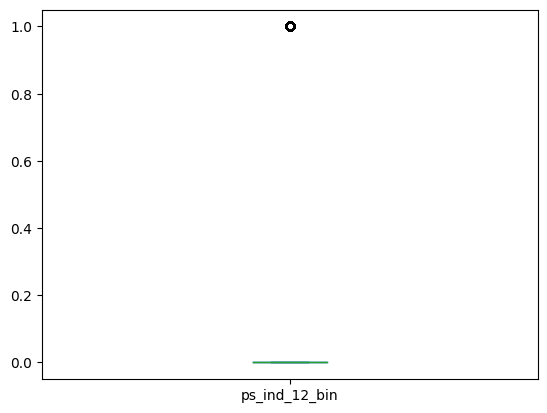

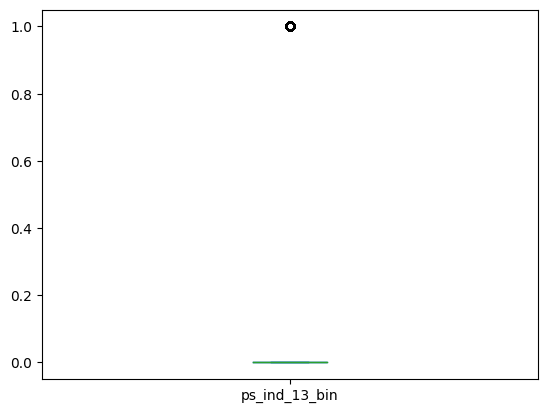

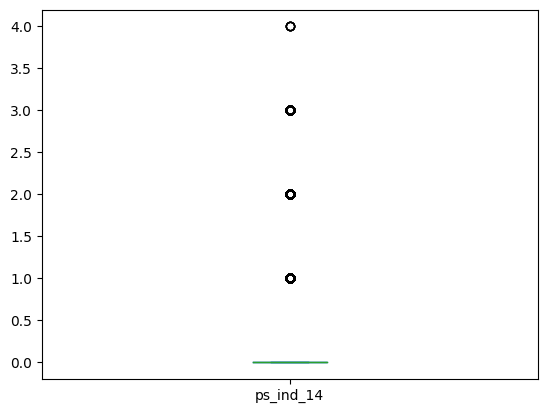

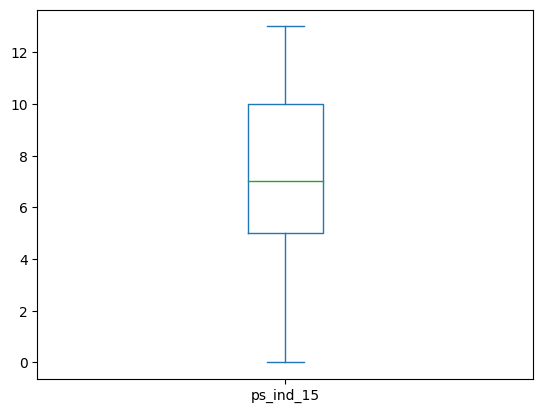

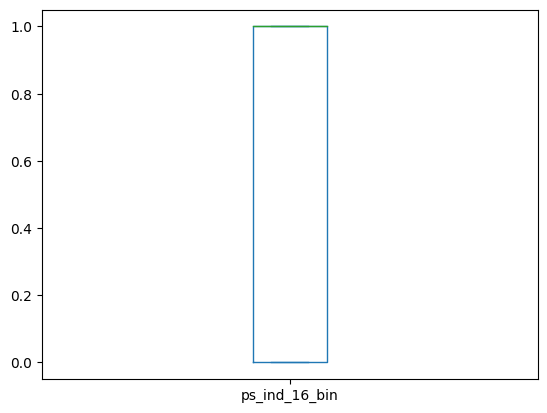

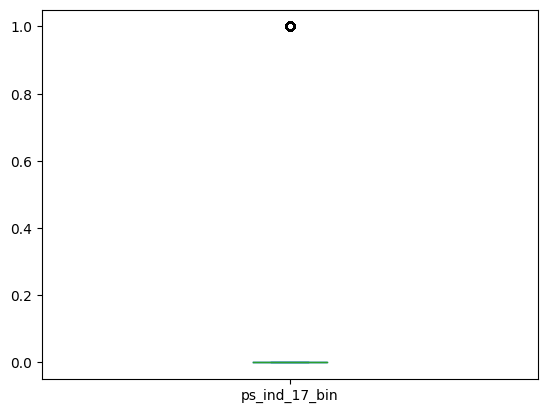

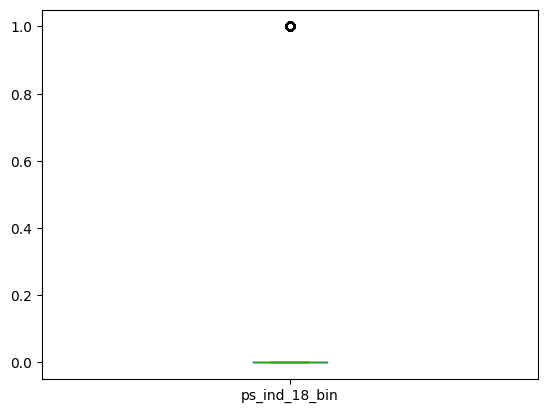

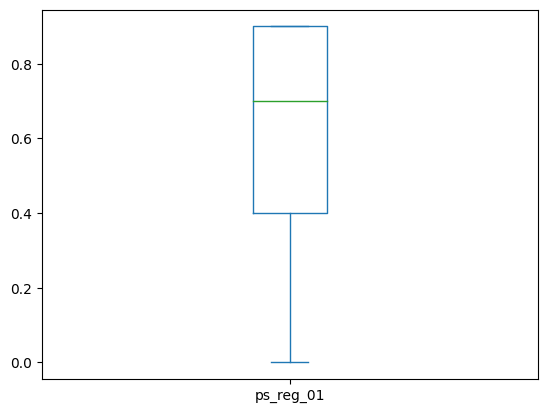

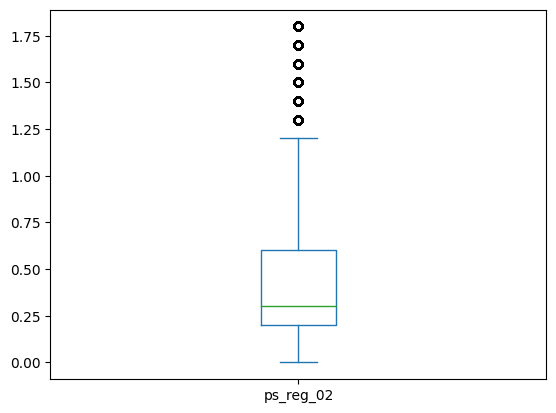

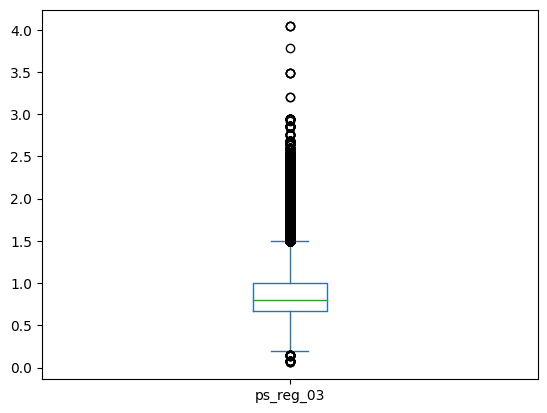

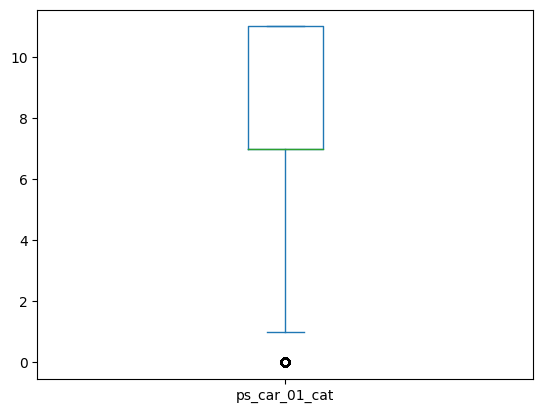

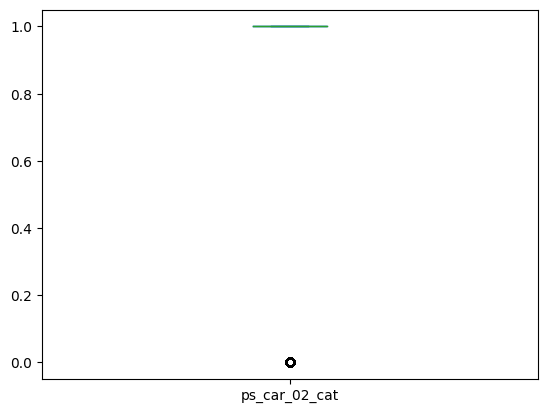

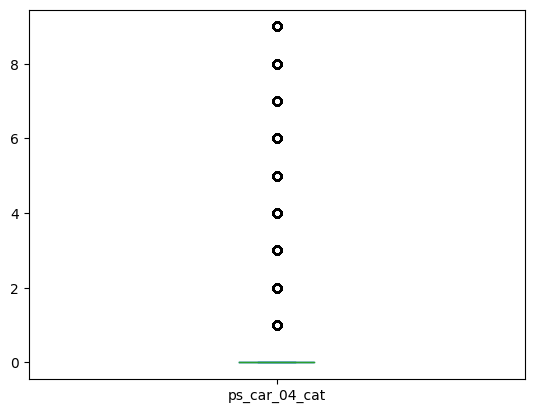

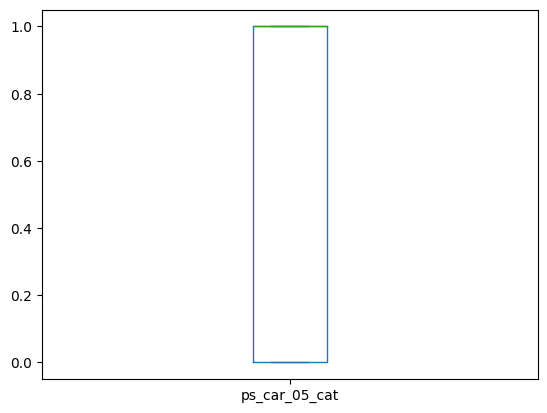

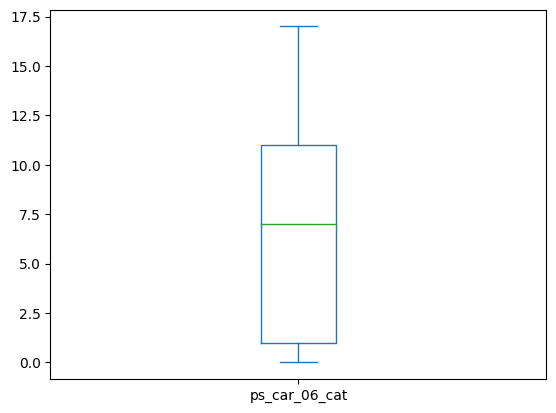

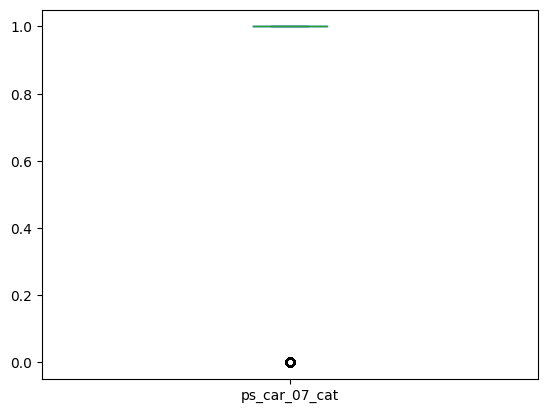

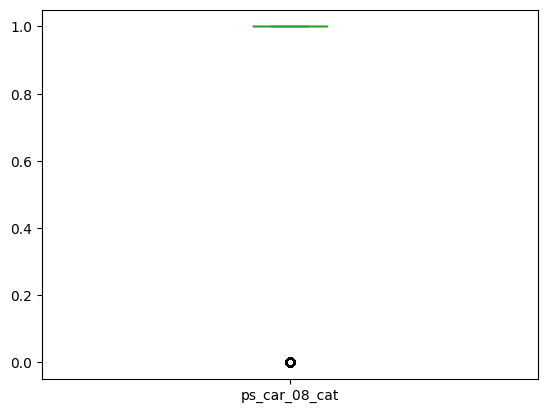

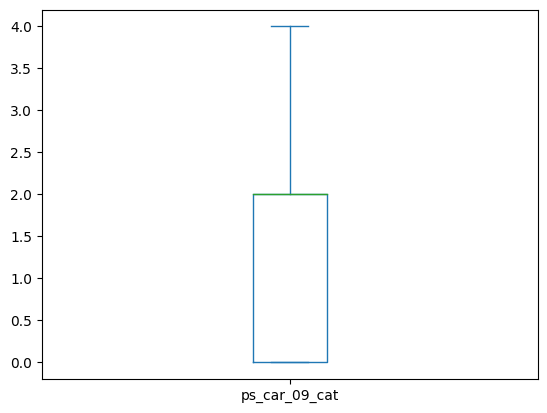

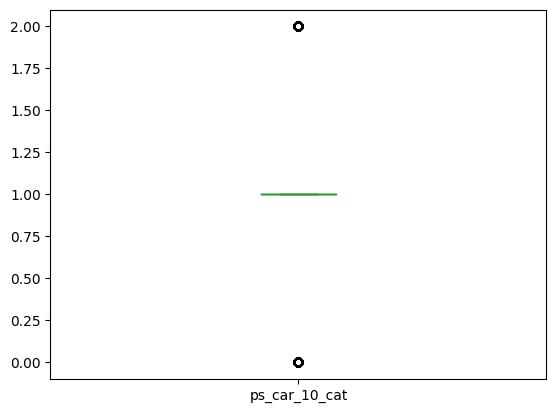

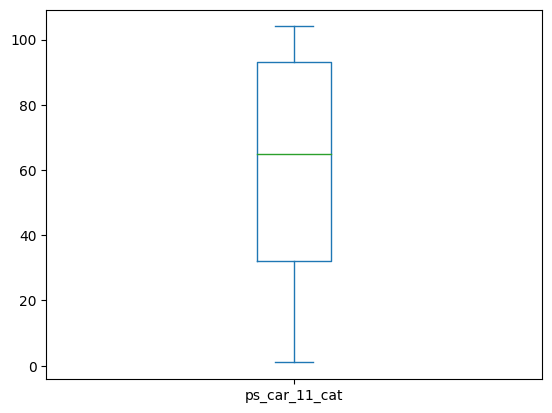

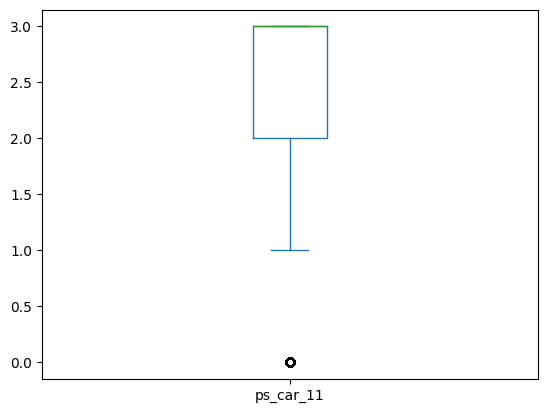

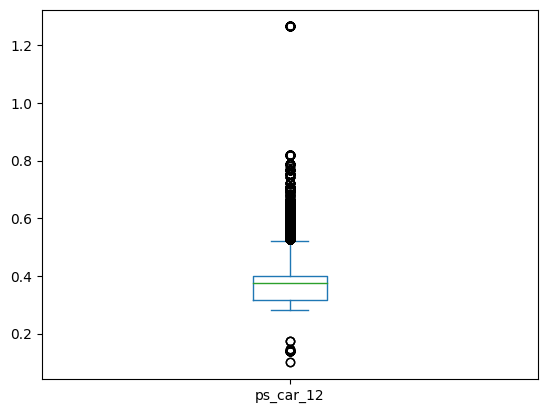

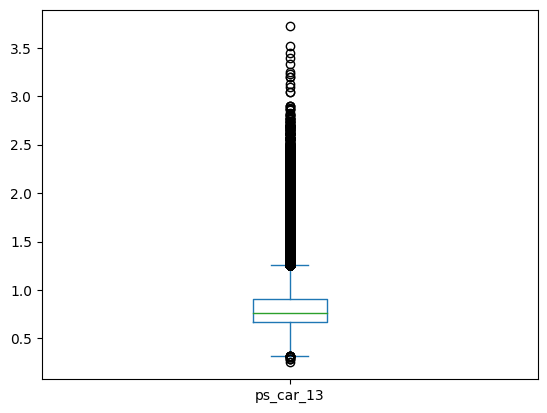

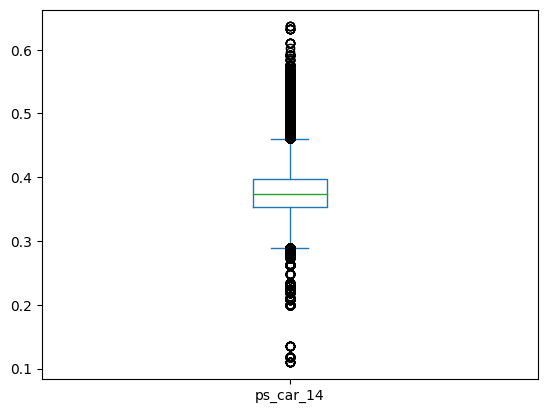

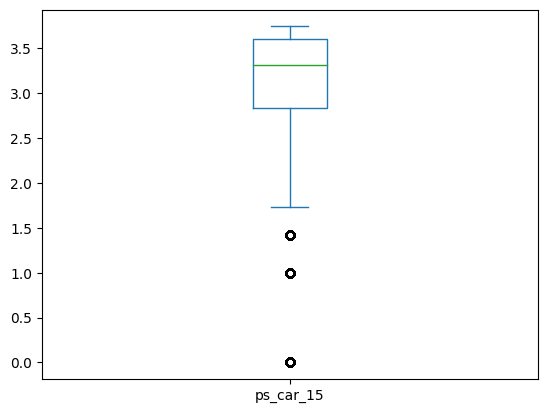

In [ ]:
for cols in df.columns:
    df[cols].plot(kind='box')
    plt.show()

In [6]:
X=df.drop(['target','id'],axis=1)
y=df.target

### The proportion of records with target=1 is very less compared to that of target =0. So oversampling is done to handle the imbalanced target dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)

In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)
print(Counter(y_train_sm))

Counter({0: 573518, 1: 21694})
Counter({0: 430138, 1: 430138})


In [10]:
! pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_roc_curve as auc_roc

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,roc_auc_score
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.decomposition import PCA

### Dimensionality reduction technique PCA is used here to reduce the curse of dimensionality (we have around 59 features in the dataset),reduce the training time and overfitting issues

## PCA

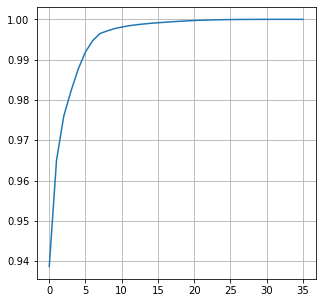

In [12]:

pca = PCA()
x_pca = pca.fit_transform(X_train_sm)
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [13]:
# We can see that 3 PCA attribute for more than 98% of the variations in data and 5 pricipal component explains more than 99% of the variance in the data.
# Here we are using 3 Principal components. 
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.fit_transform(X_test)
len(X_train_pca)

860276

## Logistic Regression model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
lr = LogisticRegression()
lr.fit(X_train_pca, y_train_sm)
lr_predict = lr.predict(X_test_pca)
y_pred_train = lr.predict(X_train_pca)


In [27]:
print('Classification Report Test')
print(classification_report(y_test, lr_predict))
print('Classification Report Train')
print(classification_report(y_train_sm,y_pred_train))


Classification Report Test
              precision    recall  f1-score   support

           0       0.97      0.51      0.66    143380
           1       0.04      0.54      0.07      5423

    accuracy                           0.51    148803
   macro avg       0.50      0.52      0.37    148803
weighted avg       0.93      0.51      0.64    148803

Classification Report Train
              precision    recall  f1-score   support

           0       0.55      0.55      0.55    430138
           1       0.55      0.55      0.55    430138

    accuracy                           0.55    860276
   macro avg       0.55      0.55      0.55    860276
weighted avg       0.55      0.55      0.55    860276



# `Plotting auc-roc curves`

### **Calculate AUROC**
**ROC** is the receiver operating characteristic
**AUROC** is the area under the ROC curve

In [ ]:
#Prediction probabilities
lr_probs = lr.predict_proba(X_test_pca)
lr_probs = lr_probs[:, 1]

In [24]:
from sklearn.metrics import roc_curve,auc

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


ROC AUC=0.52


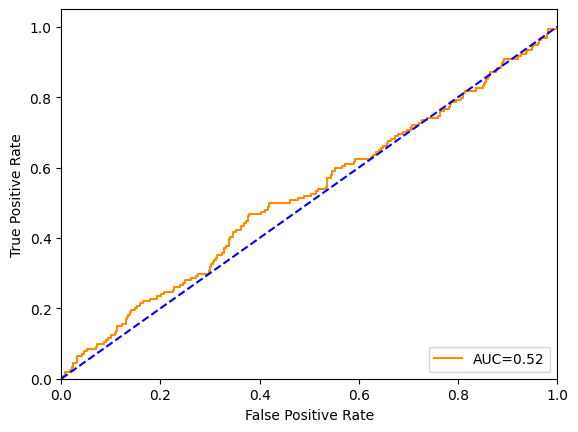

In [ ]:
#Logistic regression
plot_roc2(y_test,X_test_pca,lr)

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()  
dt.fit(X_train_pca,y_train_sm)
y_dt_test=dt.predict(X_test_pca)
y_dt_train=dt.predict(X_train_pca)

In [29]:
print('Classification Report Test')
print(classification_report(y_test, y_dt_test))
print('Classification Report Train')
print(classification_report(y_train_sm,y_dt_train))

Classification Report Test
              precision    recall  f1-score   support

           0       0.96      0.80      0.87    143380
           1       0.04      0.21      0.06      5423

    accuracy                           0.77    148803
   macro avg       0.50      0.50      0.47    148803
weighted avg       0.93      0.77      0.84    148803

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430138
           1       1.00      1.00      1.00    430138

    accuracy                           1.00    860276
   macro avg       1.00      1.00      1.00    860276
weighted avg       1.00      1.00      1.00    860276



## Plotting auc-roc curves

In [ ]:
#Prediction probabilities
dt_probs = dt.predict_proba(X_test_pca)
dt_probs = dt_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


ROC AUC=0.51


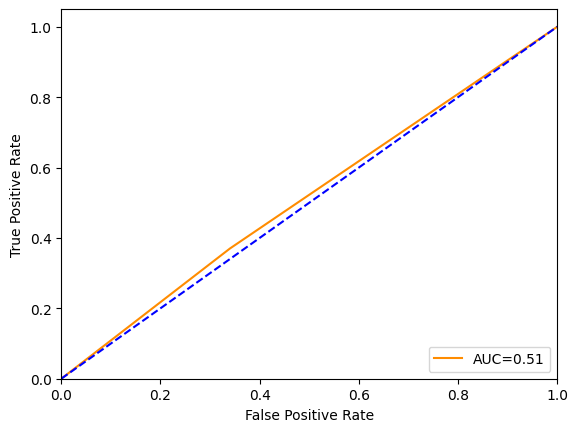

In [ ]:
#Decision tree classifier
plot_roc2(y_test,X_test_pca,dt)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
clf_rf = RandomForestClassifier(n_estimators=100)      
clf_rf.fit(X_train_pca,y_train_sm)
clr_rf_train=clf_rf.predict(X_train_pca)
clr_rf_test=clf_rf.predict(X_test_pca)
print('Classification Report Test',classification_report(y_test, clr_rf_test))
print('Classification Report Train',classification_report(y_train_sm,clr_rf_train))

Classification Report Test               precision    recall  f1-score   support

           0       0.96      0.79      0.87      3918
           1       0.04      0.21      0.07       154

    accuracy                           0.77      4072
   macro avg       0.50      0.50      0.47      4072
weighted avg       0.93      0.77      0.84      4072

Classification Report Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11753
           1       1.00      1.00      1.00     11753

    accuracy                           1.00     23506
   macro avg       1.00      1.00      1.00     23506
weighted avg       1.00      1.00      1.00     23506



# Plotting auc-roc curves

In [ ]:
#Prediction probabilities
clf_rf_probs = clf_rf.predict_proba(X_test_pca)
clf_rf_probs = clf_rf_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.50


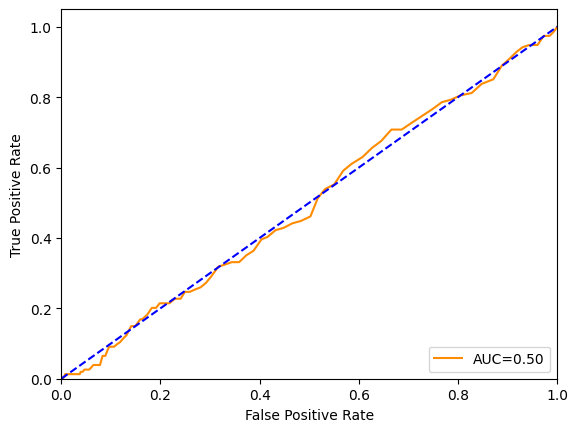

In [ ]:
#Random forest
plot_roc2(y_test,X_test_pca,clf_rf)

## Hyperparameter Tuning

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=20, stop=200, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [1,2,3,4, 5,]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train_pca, y_train_sm)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False})


In [16]:
rf_clf2 = RandomForestClassifier(n_estimators=40,min_samples_split=2,min_samples_leaf=1,max_depth=70,bootstrap=False,max_features='sqrt') 
rf_clf2.fit(X_train_pca, y_train_sm)
y_predict_rf1=rf_clf2.predict(X_test_pca)
y_pred_rf2=rf_clf2.predict(X_train_pca)

In [17]:
print('Classification Report Test')
print(classification_report(y_test, y_predict_rf1))
print('Classification Report Train')
print(classification_report(y_train_sm,y_pred_rf2))


Classification Report Test
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    143380
           1       0.04      0.05      0.04      5423

    accuracy                           0.92    148803
   macro avg       0.50      0.50      0.50    148803
weighted avg       0.93      0.92      0.93    148803

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430138
           1       1.00      1.00      1.00    430138

    accuracy                           1.00    860276
   macro avg       1.00      1.00      1.00    860276
weighted avg       1.00      1.00      1.00    860276



In [19]:
#Prediction probabilities
clf_rf2_probs = rf_clf2.predict_proba(X_test_pca)
clf_rf2_probs = clf_rf2_probs[:, 1]

In [20]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.50


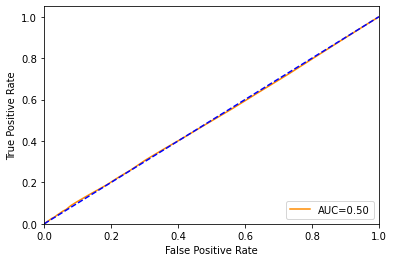

In [25]:
#Random forest
plot_roc2(y_test,X_test_pca,rf_clf2)

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca,y_train_sm)
nb_predict=nb.predict(X_test_pca)

In [36]:
y_pred_nb=nb.predict(X_train_pca)
print('Classification Report Test',classification_report(y_test, nb_predict))
print('Classification Report Train',classification_report(y_train_sm,y_pred_nb))


Classification Report Test               precision    recall  f1-score   support

           0       0.97      0.46      0.62    143380
           1       0.04      0.58      0.07      5423

    accuracy                           0.46    148803
   macro avg       0.50      0.52      0.35    148803
weighted avg       0.93      0.46      0.60    148803

Classification Report Train               precision    recall  f1-score   support

           0       0.55      0.50      0.53    430138
           1       0.55      0.60      0.57    430138

    accuracy                           0.55    860276
   macro avg       0.55      0.55      0.55    860276
weighted avg       0.55      0.55      0.55    860276



# Plotting auc-roc curves

In [ ]:
#Prediction probabilities
nb_probs = nb.predict_proba(X_test_pca)
nb_probs = nb_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.53


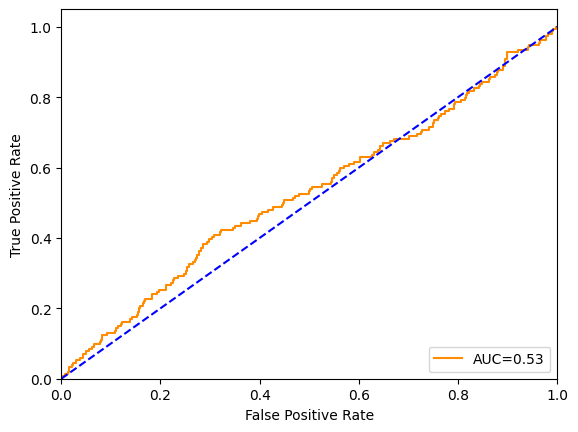

In [ ]:
#naive bayes
plot_roc2(y_test,X_test_pca,nb)

## Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() 
gbm.fit(X_train_pca,y_train_sm) 
X_train_gm = gbm.predict(X_train_pca)

In [ ]:
X_test_gm=gbm.predict(X_test_pca)
print('Classification Report Test',classification_report(y_test, X_test_gm))
print('Classification Report Train',classification_report(y_train_sm,X_train_gm))


Classification Report Test               precision    recall  f1-score   support

           0       0.97      0.57      0.72      3918
           1       0.04      0.49      0.08       154

    accuracy                           0.57      4072
   macro avg       0.50      0.53      0.40      4072
weighted avg       0.93      0.57      0.69      4072

Classification Report Train               precision    recall  f1-score   support

           0       0.72      0.69      0.71     11753
           1       0.70      0.74      0.72     11753

    accuracy                           0.71     23506
   macro avg       0.71      0.71      0.71     23506
weighted avg       0.71      0.71      0.71     23506



# Plotting auc-roc curve

In [ ]:
#Prediction probabilities
gbm_probs = gbm.predict_proba(X_test_pca)
gbm_probs = gbm_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.51


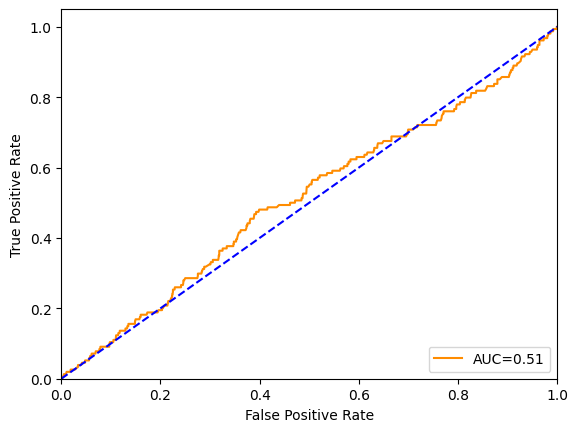

In [ ]:
#Gradient boosting
plot_roc2(y_test,X_test_pca,gbm)

## XGBoost

In [34]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(X_train_pca,y_train_sm)
y_hat_xgb=xgb_r.predict(X_test_pca)
X_train_xgb=xgb_r.predict(X_train_pca)

In [35]:
print('Classification Report Test',classification_report(y_test, y_hat_xgb))
print('Classification Report Train',classification_report(y_train_sm,X_train_xgb))


Classification Report Test               precision    recall  f1-score   support

           0       0.96      0.62      0.75    143380
           1       0.04      0.40      0.07      5423

    accuracy                           0.61    148803
   macro avg       0.50      0.51      0.41    148803
weighted avg       0.93      0.61      0.73    148803

Classification Report Train               precision    recall  f1-score   support

           0       0.66      0.65      0.65    430138
           1       0.65      0.66      0.66    430138

    accuracy                           0.65    860276
   macro avg       0.65      0.65      0.65    860276
weighted avg       0.65      0.65      0.65    860276



# Plotting auc-roc curve

In [ ]:
#Prediction probabilities
xgb_r_probs = xgb_r.predict_proba(X_test_pca)
xgb_r_probs = xgb_r_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.54


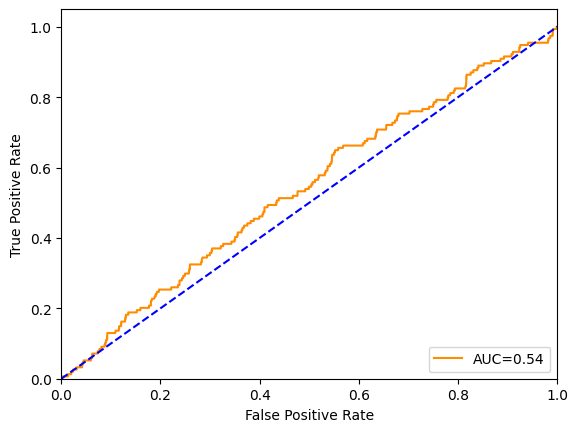

In [ ]:
#XGBoost
plot_roc2(y_test,X_test_pca,xgb_r)

# K nearest neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca,y_train_sm)
    pred_i = knn.predict(X_test_pca)
    error_rate.append(np.mean(pred_i != y_test))

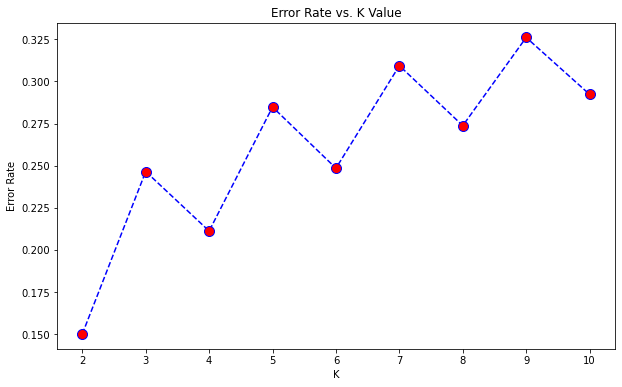

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [38]:
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train_pca,y_train_sm)
knc_test=knc.predict(X_test_pca)
knc_train=knc.predict(X_train_pca)

In [40]:
print('Classification Report Test',classification_report(y_test, knc_test))
print('Classification Report Train',classification_report(y_train_sm,knc_train))

Classification Report Test               precision    recall  f1-score   support

           0       0.96      0.77      0.86    143380
           1       0.04      0.24      0.07      5423

    accuracy                           0.75    148803
   macro avg       0.50      0.51      0.46    148803
weighted avg       0.93      0.75      0.83    148803

Classification Report Train               precision    recall  f1-score   support

           0       0.96      0.87      0.91    430138
           1       0.88      0.97      0.92    430138

    accuracy                           0.92    860276
   macro avg       0.92      0.92      0.92    860276
weighted avg       0.92      0.92      0.92    860276



# Plotting auc-roc curve

In [ ]:
#Prediction probabilities
knc_probs = knc.predict_proba(X_test_pca)
knc_probs = knc_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.49


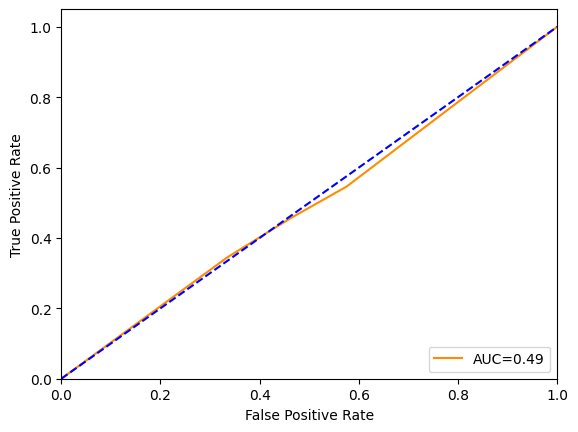

In [ ]:
#Knearestneighbors
plot_roc2(y_test,X_test_pca,knc)

## MLP Classifier

In [41]:
from sklearn.neural_network import MLPClassifier
mlp_nn=MLPClassifier(random_state=42, max_iter=300)
mlp_nn.fit(X_train_pca,y_train_sm)
mlp_nn_test=mlp_nn.predict(X_test_pca)
mlp_nn_train=mlp_nn.predict(X_train_pca)

In [42]:
print('Classification Report Test',classification_report(y_test, mlp_nn_test))
print('Classification Report Train',classification_report(y_train_sm,mlp_nn_train))


Classification Report Test               precision    recall  f1-score   support

           0       0.97      0.47      0.63    143380
           1       0.04      0.59      0.08      5423

    accuracy                           0.47    148803
   macro avg       0.50      0.53      0.35    148803
weighted avg       0.93      0.47      0.61    148803

Classification Report Train               precision    recall  f1-score   support

           0       0.56      0.49      0.52    430138
           1       0.55      0.61      0.58    430138

    accuracy                           0.55    860276
   macro avg       0.55      0.55      0.55    860276
weighted avg       0.55      0.55      0.55    860276



# plotting auc-roc curve

In [ ]:
#Prediction probabilities
mlp_nn_probs = mlp_nn.predict_proba(X_test_pca)
mlp_nn_probs = mlp_nn_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.49


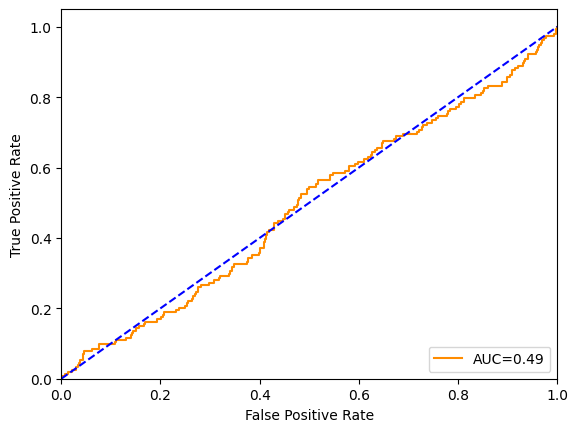

In [ ]:
#Knearestneighbors
plot_roc2(y_test,X_test_pca,mlp_nn)

## SVM

### We tried running SVM for over 18hrs,however the training was not completed. So we are not proceeding with SVM

In [ ]:

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear') 
svclassifier.fit(X_train_pca, y_train_sm)
y_test_svc=svclassifier.predict(X_test_pca)
y_train_svc=svclassifier.predict(X_train_pca)

### Trying the above process using undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample=RandomUnderSampler()
X_train_under,y_train_under=undersample.fit_resample(X_train,y_train)
print(Counter(y))
print(Counter(y_train_under))

Counter({0: 573518, 1: 21694})
Counter({0: 16271, 1: 16271})


In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_under)
X_test_pca = pca.fit_transform(X_test)
len(X_train_pca)

32542

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
lr = LogisticRegression()
lr.fit(X_train_pca, y_train_under)
lr_predict = lr.predict(X_test_pca)
y_pred_train = lr.predict(X_train_pca)
print('Classification Report Test')
print(classification_report(y_test, lr_predict))
print('Classification Report Train')
print(classification_report(y_train_under,y_pred_train))

Classification Report Test
              precision    recall  f1-score   support

           0       0.97      0.51      0.67    143380
           1       0.04      0.54      0.08      5423

    accuracy                           0.51    148803
   macro avg       0.50      0.53      0.37    148803
weighted avg       0.93      0.51      0.65    148803

Classification Report Train
              precision    recall  f1-score   support

           0       0.52      0.53      0.53     16271
           1       0.52      0.51      0.52     16271

    accuracy                           0.52     32542
   macro avg       0.52      0.52      0.52     32542
weighted avg       0.52      0.52      0.52     32542



# Plotting auc roc curves

In [ ]:
#Prediction probabilities
lr_probs = lr.predict_proba(X_test_pca)
lr_probs = lr_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.54


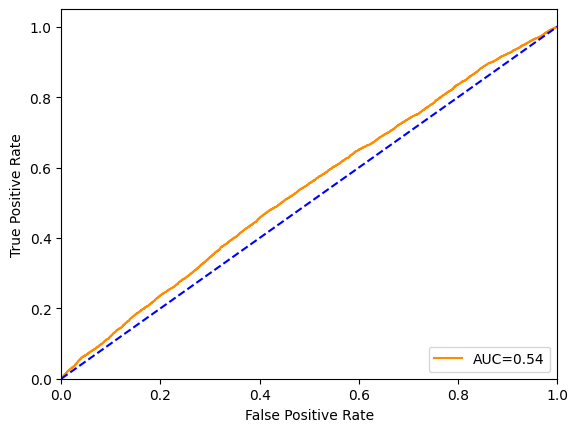

In [ ]:
#logistic regression
plot_roc2(y_test,X_test_pca,lr)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
clf_rf = RandomForestClassifier(n_estimators=100)      
clf_rf.fit(X_train_pca,y_train_under)
clr_rf_train=clf_rf.predict(X_train_pca)
clr_rf_test=clf_rf.predict(X_test_pca)
print('Classification Report Test',classification_report(y_test, clr_rf_test))
print('Classification Report Train',classification_report(y_train_under,clr_rf_train))

Classification Report Test               precision    recall  f1-score   support

           0       0.97      0.44      0.60    143380
           1       0.04      0.58      0.07      5423

    accuracy                           0.44    148803
   macro avg       0.50      0.51      0.34    148803
weighted avg       0.93      0.44      0.58    148803

Classification Report Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16271
           1       1.00      1.00      1.00     16271

    accuracy                           1.00     32542
   macro avg       1.00      1.00      1.00     32542
weighted avg       1.00      1.00      1.00     32542



# Plotting auc-roc curves

In [ ]:
#Prediction probabilities
clf_rf_probs = clf_rf.predict_proba(X_test_pca)
clf_rf_probs = clf_rf_probs[:, 1]

In [ ]:
#Making the ROC curve plotting function more generic
def plot_roc2(y_test,xtest,model):
    
    if hasattr(model,'decision_function'):
        probs=model.decision_function(X_test_pca) 
    elif hasattr(model,'predict_proba'):
        probs=model.predict_proba(X_test_pca) [:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.52


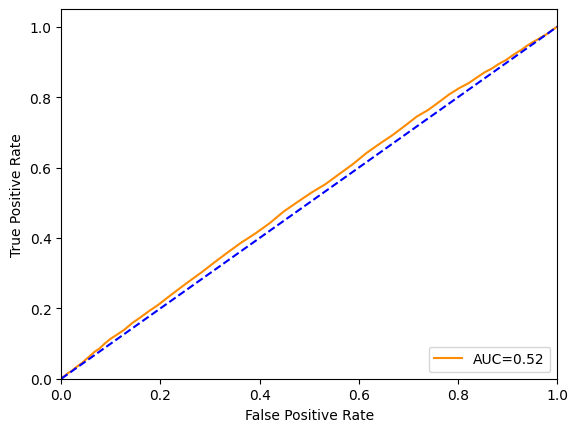

In [ ]:
#Random forest
plot_roc2(y_test,X_test_pca,clf_rf)

#### From the above it is clear that undersampling was not a good option as the model performance metrics has dropped tremendously

## Evaluation Metrics
#### Accuracy alone for a classification problem cannot always be considered because the model could be biased towards the majority class giving high accuracy and less accuracy for minority class making it less reliable for imbalanced data.(Here majority of the policy holder do not make a claim).
#### F1 score is the harmonic mean of precision and recall and is used when we need to find a balance between precision and recall which is important in scenarios of imbalanced datsets.
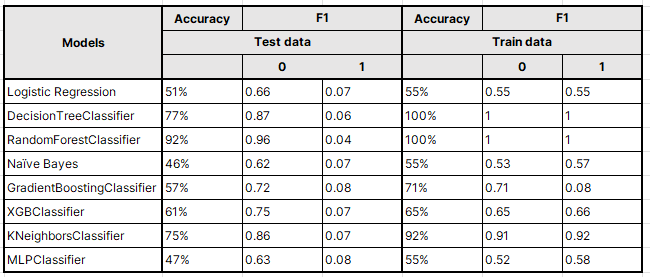


##### Higher the F1score, better the model's classification outcomes. 

## Conclusion

#### Random forest has an f1 score for majority class as 0.95 which means the model is that there is a 95% chances that the model is able to distinguish between the positive and negative classes. Hence out of all the models above, random forest classifier is the best model for our classification problem

### Task 2:-Suggestions to the Insurance market team to make  customers  buy the product.

#### Due to privacy concerns, since we dont have the name of the features, it will be really difficult to investigate how the marketting team can increase their customer base.However from the dataset we can assume that there could be fields corresponding to the location,vehicle information,age,gender,vehicle use etc.
#### For example: 
#### * Young drivers tends to pay more insurance fee as they do not have much experience on road and has high possibility of accident.
#### * As per the stats, female drivers are considered to be more safe drivers than male drivers.
#### * Drivers who drive more mileage are likely to get into accidents leading to higher premium.
#### * As the vehicle ages, the IDV value decreases so does the premium.
#### * Vehicles that run on diesel are more expensive and so is their IDV value
#### * If the driver has more claim/accident histories, the premium should be increased.
#### * Type of the car, if it is a premium level car and has security features like anti-theft etc, the customer can qualify for discounts.
#### * Area or country the customer live: Urban neighborhoods typically have higher rates of accidents than rural areas.

#### After analysing the customer history using few of the above metioned factors, the company can identify the level of risk posed by a customer and either increase or decrease the premium rates accordingly to attract more customers.

## Challenges Faced: 
* It was really difficult to understand and make assumptions from the dataset as we had no information about the fields
* Since the dataset was so huge, the computational time for training the model was considerably high. Few attempts of training/hyper parameter tuning was done on google collab making use of the GPU's, or even leaving the model to train overnight. However SVM with linear kernel ran for more than 18 hours and the run was terminated.
* The f1 score of the minority class is way lower than that of the majority class. However, we assume that the data could be corrupted and the highly imbalanced dataset has resulted in low f1 score for minority class.
* The model creation was repeated with PCA on the dataset followed by smoting on train dataset. However, the model performance was slightly lower when compared to the process that was followed above (i.e., smote on train dataset, followed by PCA )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')